In [8]:
import numpy as np
from pathlib import Path
import pandas as pd
from skimage import io
from scipy.stats import zscore

from utilities import Experiment

from matplotlib import pyplot as plt
%matplotlib notebook

import seaborn as sns
sns.set(style="ticks", palette="deep")
plt.style.use('v_arial')
c = sns.color_palette()

## Load experiment data

Load experiment with the Experiment class:

In [3]:
exp = Experiment(r"J:\_Shared\stytra\manuscript\datasets\example_closed_loop_embedded\181115_f10")

Use experiment class methods for loading logs from the experiment:

In [4]:
tail_log_df = exp.behavior_log.set_index("t")  # DataFrame with the tail trace
estm_log_df = exp.estimator_log.set_index("t")  # DataFrame with vigour estimator
stim_log_df = exp.stimulus_param_log.set_index("t")  # DataFrame with gratings data

In [5]:
# Find start and end times of every stimulus using the dataframe with the baseline grating velocity:
vel_arr = stim_log_df["closed loop 1D_base_vel"].as_matrix()
gain_arr = stim_log_df["closed loop 1D_gain"].as_matrix()
start_idxs = np.argwhere(np.diff(vel_arr) < 0)[:,0]
end_idxs = np.argwhere(np.diff(vel_arr) > 0)[:,0]

start_times = stim_log_df.index[start_idxs+1]
end_times = stim_log_df.index[end_idxs+1]
gains = gain_arr[start_idxs+1]

## Create figure with all the closed-loop experiment variables

<IPython.core.display.Javascript object>


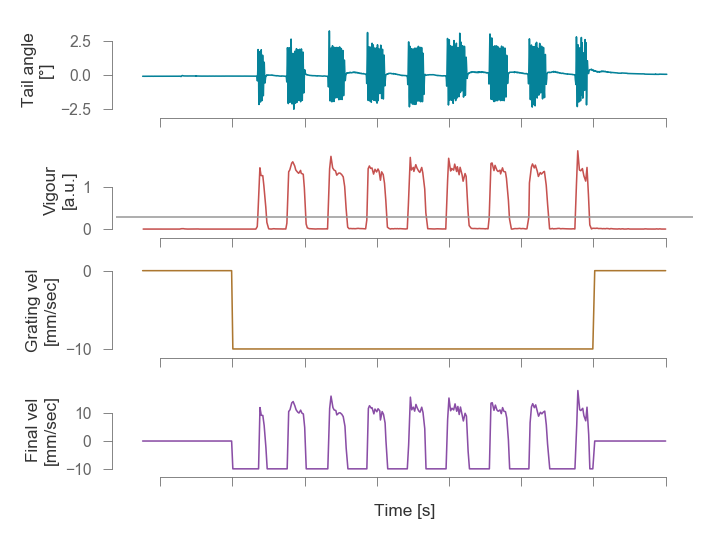

In [9]:
stim_idx = 0
t_slice = slice(start_times[stim_idx]-2.5, end_times[stim_idx]+2)  # select stimulus time

fig, axs = plt.subplots(4, 1, sharex=True)

plt.sca(axs[0])
plt.plot(tail_log_df["tail_sum"][t_slice], c=c[0])
plt.gca().xaxis.set_ticklabels([])
plt.ylabel('Tail angle\n[°]')

plt.sca(axs[1])
plt.plot(estm_log_df["vigour"][t_slice], c=c[1])
plt.axhline(0.3, c=(0.6,)*3)
plt.gca().xaxis.set_ticklabels([])
plt.ylabel('Vigour\n[a.u.]')

plt.sca(axs[2])
plt.plot(stim_log_df["closed loop 1D_base_vel"][t_slice], c=c[2])
plt.gca().xaxis.set_ticklabels([])
plt.ylabel('Grating vel\n[mm/sec]')
# ax.get_xaxis().set_visible(False)
# sns.despine(bottom=True)

plt.sca(axs[3])
plt.plot(stim_log_df["closed loop 1D_vel"][t_slice],  c=c[3])
# plt.xticks(xticks)
# plt.yticks([-15,0, 15])
plt.ylabel('Final vel\n[mm/sec]')
plt.xlabel('Time [s]')
sns.despine(trim=True, offset=3)

plt.tight_layout()

In [18]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['svg.fonttype'] = 'none'

fig.savefig("closed_loop_1D.svg", format="svg")